In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import os
import soundfile as sf
import pickle

In [3]:
def get_dft(x):
    """
    Return the non-redundant real/imaginary components
    of the DFT, expressed as amplitudes of sines/cosines
    involved
    
    Parameters
    ----------
    x: ndarray(N)
        A signal
    
    Returns
    -------
    cos_sum: ndarray(ceil(N/2)), sin_sums(ndarray(ceil(N/2)))
        DFT cosine/sine amplitudes
    """
    N = len(x)
    t = np.linspace(0, 1, N+1)[0:N]
    n_freqs = int(np.ceil(N/2))
    f = np.fft.fft(x)
    cos_sums = np.real(f)[0:n_freqs]/(N/2)
    sin_sums = -np.imag(f)[0:n_freqs]/(N/2)
    return cos_sums, sin_sums

In [4]:
x, sr = librosa.load("samples/classical_segment_001.wav")
ipd.Audio(x, rate=sr)

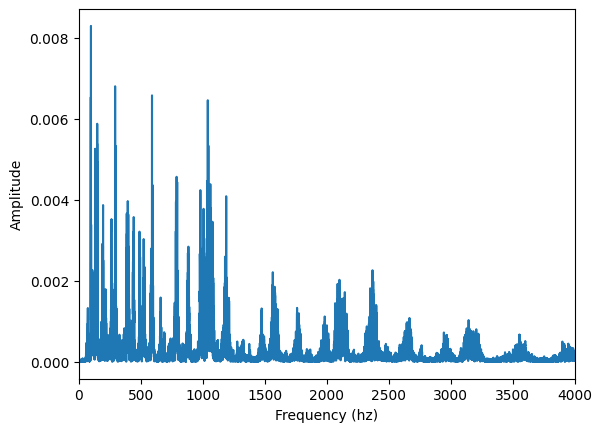

In [5]:
x, sr = librosa.load("samples/classical_segment_001.wav")
N = len(x)
c, s = get_dft(x)
amps = np.sqrt(c**2 + s**2)
freqs = np.arange(len(c))*sr/len(x)
plt.plot(freqs, amps)
plt.xlabel("Frequency (hz)")
plt.ylabel("Amplitude")
plt.xlim([0, 4000])
ipd.Audio(x, rate=sr)

In [6]:
def specgram(x, w, h, sr):
    """
    Compute the "spectrogram" 
    (amplitudes of the short-time fourier transfrom)
    Parameters
    ----------
    x: ndarray(N)
        Full audio clip of N samples
    w: int
        Window length
    h: int
        Hop length
    sr: int
        Sample rate
    
    Returns
    -------
    ndarray(w, nwindows) Spectrogram
    """
    N = len(x)
    i = 0
    nwin = int(np.floor((N-w)/h))+1
    n_freqs = int(np.ceil(w/2))
    # Make a 2D array
    # The rows correspond to frequency bins
    # The columns correspond to windows moved forward in time
    S = np.zeros((n_freqs, nwin))
    # Loop through all of the windows, and put the fourier
    # transform amplitudes of each window in its own column
    for j in range(nwin):
        # Pull out the audio in the jth window
        # Ex) First window x[0:w]
        # Ex) Second window x[h:h+w]
        # Ex) Third window x[2h:2h+w]
        xj = x[h*j:h*j+w]
        # Do the fourier transform of the jth window
        c, s = get_dft(xj)
        amps = np.sqrt(c**2 + s**2)
        # Put the fourier transform amplitudes into S
        S[:, j] = amps
    return S

In [7]:
def create_images(folder_path):
    counter = 0
    for filename in os.listdir(folder_path):
        # Check if the file is a .txt file
        if filename.endswith('.wav'):
            # Construct full file path
            audio_file = os.path.join(folder_path, filename)
            x, sr = librosa.load(audio_file, sr=44100) # 44100 , 52800
            win = 2048
            hop = 256
            S = specgram(x, win, hop, sr)
            times = hop*np.arange(S.shape[1])/sr
            freqs = np.arange(S.shape[0])*sr/win
            S = np.log10(S/np.min(S))
            plt.figure(figsize=(12, 6))
            plt.imshow(S, cmap='magma_r', extent = (times[0], times[-1], freqs[-1], freqs[0]), aspect='auto', interpolation='none')
            plt.axis('off')
            plt.ylim([15000, 0]) # Zooming into a Frequency Range
            plt.gca().invert_yaxis()
            plt.savefig(f'images/{str(counter)}.png', bbox_inches='tight', pad_inches=0)
            plt.close()
            counter += 1
            #plt.colorbar()
            #plt.xlim([0, 2]) # Zooming into a Time Range 
            


In [ ]:
def create_spectograms(folder_path):
    specs = []
    for filename in os.listdir(folder_path):
        # Check if the file is a .txt file
        if filename.endswith('.wav'):
            # Construct full file path
            audio_file = os.path.join(folder_path, filename)
            x, sr = librosa.load(audio_file, sr=52800) # 44100 , 52800
            win = 2048
            hop = 256
            S = specgram(x, win, hop, sr)
            if S.min() <= 0: continue
            S = np.log10(S/np.min(S))
            specs.append(S)
    return np.array(specs)            

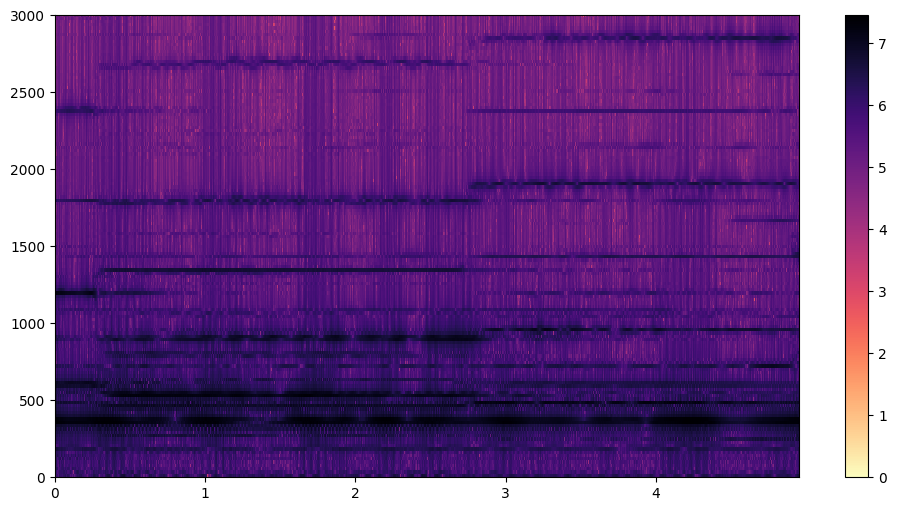

In [8]:
# Time resolution vs frequency resolution tradeoff in window size
x, sr = librosa.load("samples/classical_segment_407.wav", sr=None) # 44100 , 52800
win = 2048
hop = 256
S = specgram(x, win, hop, sr)
times = hop*np.arange(S.shape[1])/sr
freqs = np.arange(S.shape[0])*sr/win
S = np.log10(S/np.min(S))
plt.figure(figsize=(12, 6))
plt.imshow(S, cmap='magma_r', extent = (times[0], times[-1], freqs[-1], freqs[0]), aspect='auto', interpolation='none')
plt.ylim([3000, 0]) # Zooming into a Frequency Range
plt.gca().invert_yaxis()
plt.colorbar()
#plt.xlim([0, 2])

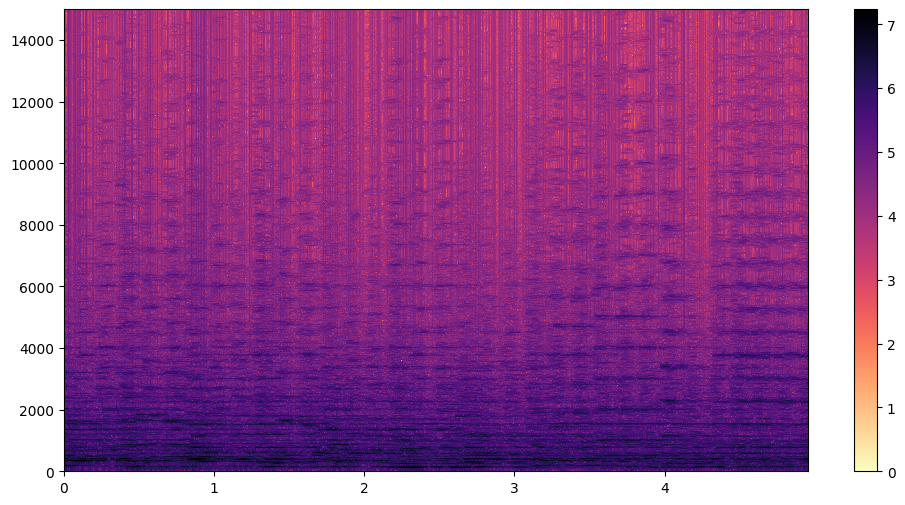

In [63]:
# Time resolution vs frequency resolution tradeoff in window size
x, sr = librosa.load("samples/classical_segment_538.wav", sr=44100) # 44100 , 52800
win = 2048
hop = 256
S = specgram(x, win, hop, sr)
times = hop*np.arange(S.shape[1])/sr
freqs = np.arange(S.shape[0])*sr/win
S = np.log10(S/np.min(S))
plt.figure(figsize=(12, 6))
plt.imshow(S, cmap='magma_r', extent = (times[0], times[-1], freqs[-1], freqs[0]), aspect='auto', interpolation='none')
plt.ylim([15000, 0]) # Zooming into a Frequency Range
plt.gca().invert_yaxis()
plt.colorbar()
#plt.xlim([0, 2]) # Zooming into a Time Range

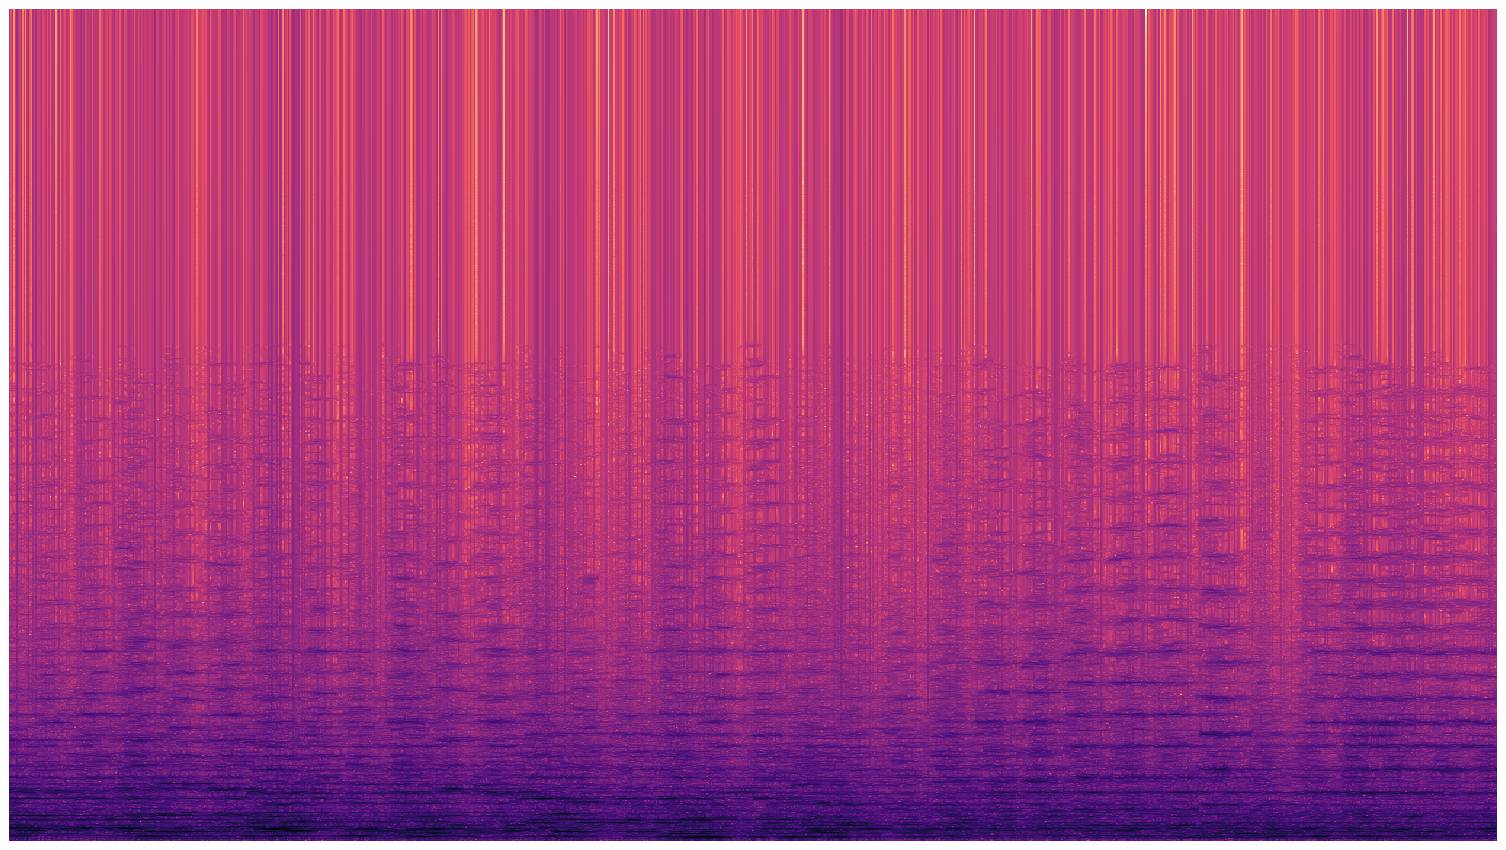

In [ ]:
x, sr = librosa.load("samples/classical_segment_538.wav", sr=52800) # 44100 , 52800
win = 2048
hop = 256
S = specgram(x, win, hop, sr)
times = hop*np.arange(S.shape[1])/sr
freqs = np.arange(S.shape[0])*sr/win
S = np.log10(S/np.min(S))
my_dpi = 92.56
plt.figure(figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
plt.imshow(S, cmap='magma_r', extent = (times[0], times[-1], freqs[-1], freqs[0]), aspect='auto', interpolation='none')
plt.axis('off')
#plt.ylim([15000, 0]) # Zooming into a Frequency Range
plt.gca().invert_yaxis()
plt.savefig(f'deneme.png',dpi=my_dpi, bbox_inches='tight', pad_inches=0)


In [ ]:
create_images('samples')
specs = create_spectograms('samples')
pickle.dump( specs, open( "specs.p", "wb" ) )